# Decision Tree algorithm
Belongs to the family of supervised learning algorithms. The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [10]:
from sklearn.datasets import load_breast_cancer

In [11]:
cancer = load_breast_cancer()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0 )

# Stratify
In this context, stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's

In [18]:
#Model

from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2, criterion = 'entropy')

In [19]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Visualizing Trees

In [22]:
from sklearn.tree import plot_tree

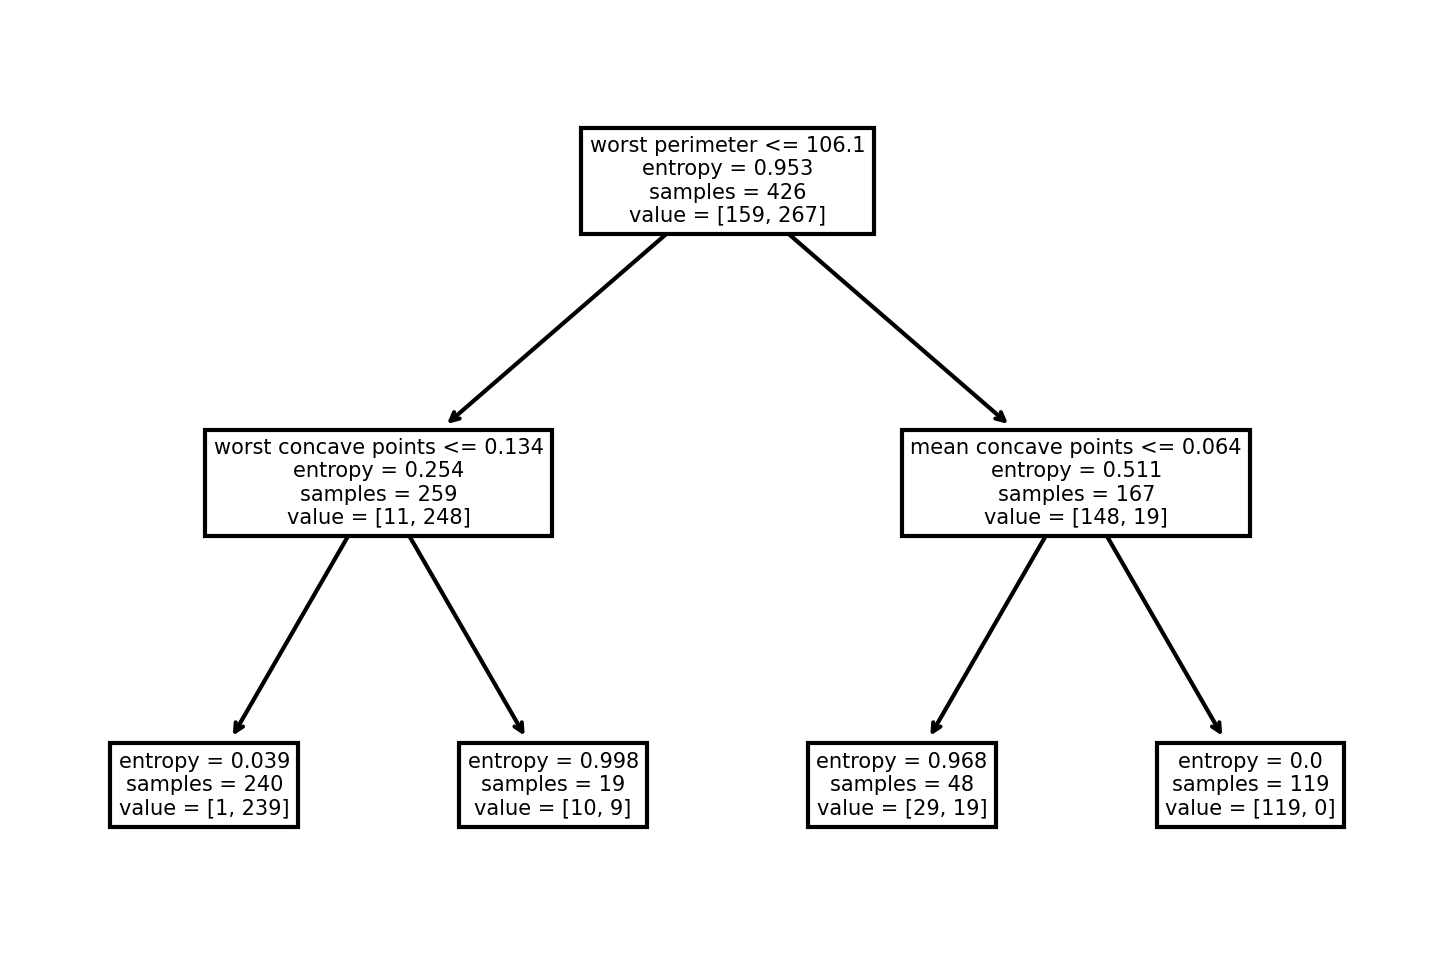

In [28]:
tree_dot = plot_tree(tree, feature_names = cancer.feature_names)

Entropy controls how a Decision Tree decides to split the data. It actually effects how a Decision Tree draws its boundaries.

In [30]:
#from tree_plotting import plot_tree

In [36]:
#ACCuracy Check

tree.score(X_test, y_test)

0.8881118881118881

# Parameter tuning
With Max_depth and Max_leat_nodes

In [51]:
#mAX_DEPTH

from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1, 7) }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 7)})

In [52]:
print('Accuracy with max_depth: ',grid.score(X_test, y_test))

Accuracy with max_depth:  0.9020979020979021


In [59]:
#Visualizing 


from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1,7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid,return_train_score=True, cv=10)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores[['mean_test_score', 'param_max_depth' ,'rank_test_score']]


,mean_test_score,param_max_depth,rank_test_score
0,0.880288,1,6
1,0.906257,2,5
2,0.913012,3,4
3,0.929457,4,3
4,0.941196,5,1
5,0.938870,6,2


In [60]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003796,0.000984,0.000801,0.000401,1,{'max_depth': 1},0.837209,0.860465,0.883721,0.953488,...,0.934726,0.926893,0.929504,0.937337,0.929688,0.929688,0.924479,0.929688,0.930884,0.003685
1,0.004000,0.000451,0.000400,0.000490,2,{'max_depth': 2},0.883721,0.906977,0.860465,0.953488,...,0.939948,0.937337,0.971279,0.947781,0.940104,0.955729,0.963542,0.963542,0.953049,0.012952
2,0.004993,0.000630,0.000701,0.000459,3,{'max_depth': 3},0.976744,0.906977,0.930233,0.930233,...,0.979112,0.981723,0.976501,0.981723,0.981771,0.979167,0.973958,0.979167,0.979135,0.002326
3,0.005596,0.000661,0.000400,0.000490,4,{'max_depth': 4},0.976744,0.883721,0.953488,0.953488,...,0.994778,0.992167,0.994778,0.997389,0.997396,1.000000,0.994792,0.992188,0.994782,0.002859
4,0.005696,0.000640,0.000399,0.000488,5,{'max_depth': 5},0.976744,0.953488,0.953488,0.953488,...,1.000000,0.997389,0.997389,1.000000,1.000000,1.000000,0.997396,1.000000,0.999217,0.001195
5,0.005698,0.000641,0.000300,0.000459,6,{'max_depth': 6},0.976744,0.953488,0.953488,0.906977,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


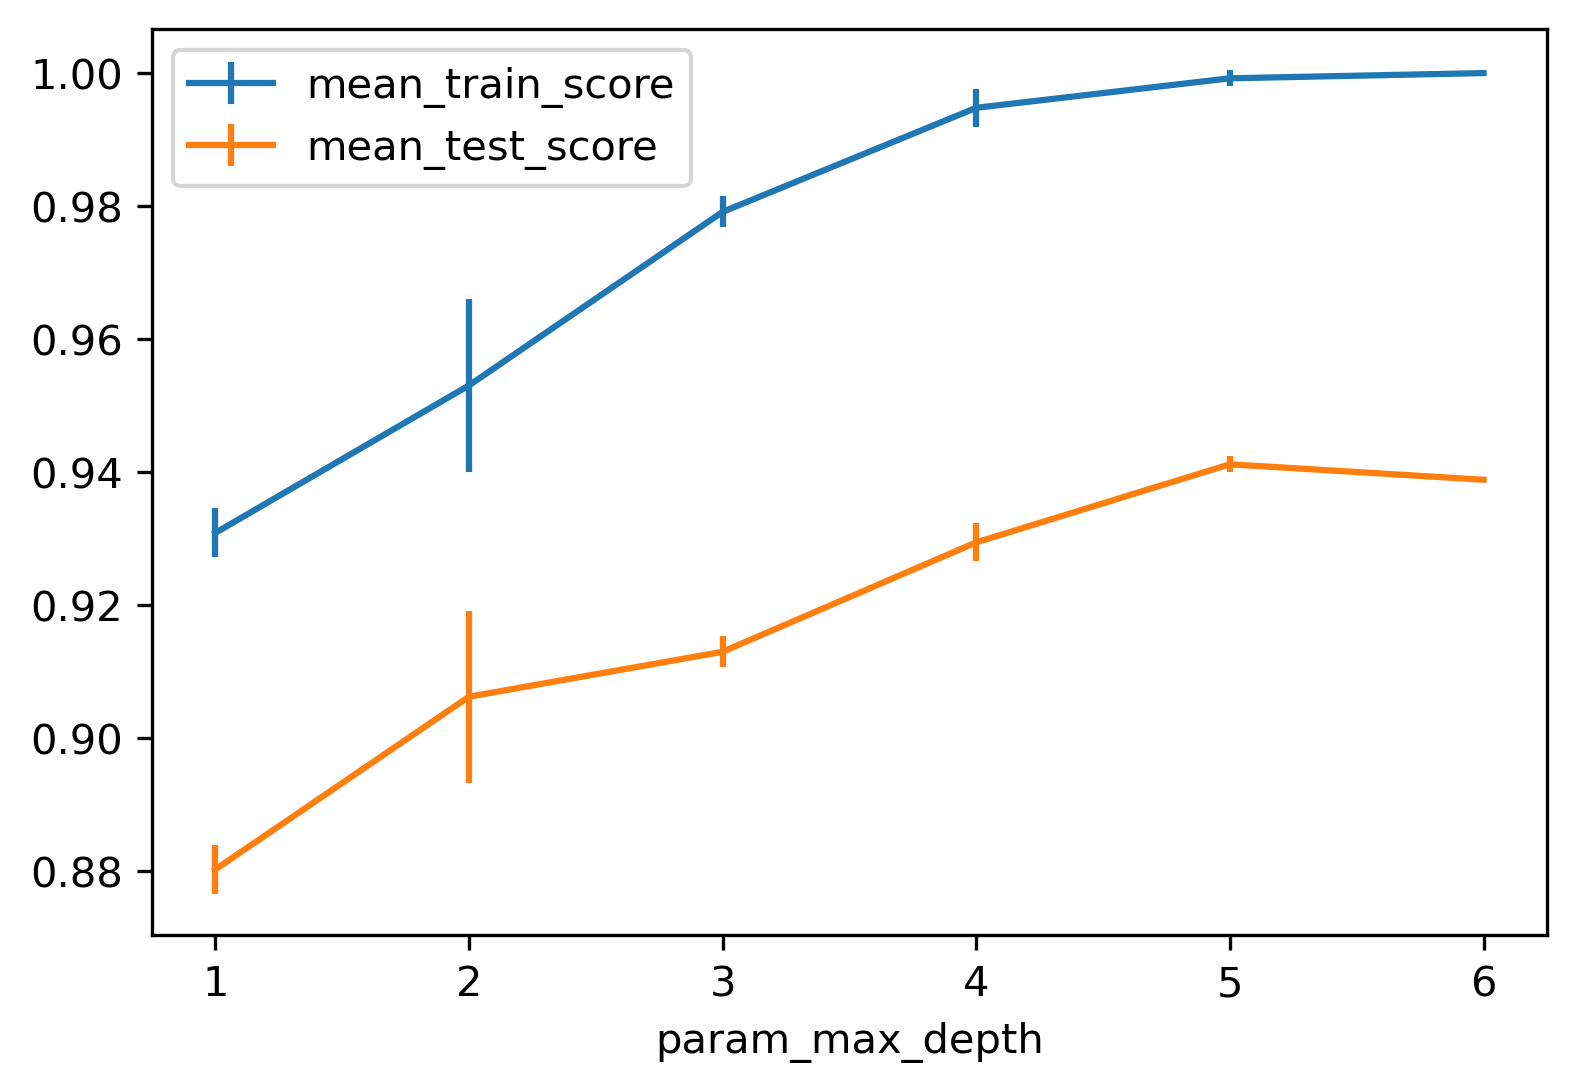

From the graph we could see that our testing data will perform better better 4 and 5 and starts decreasing. Hence 5 is the max_depth for this model


In [62]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr = 'std_train_score', ax=plt.gca() )
scores.plot(x='param_max_depth', y='mean_test_score', yerr = 'std_train_score', ax=plt.gca() )
plt.show()
print('From the graph we could see that our testing data will perform better better 4 and 5 and starts decreasing. Hence 5 is the max_depth for this model')

# Max_leaf_nodes
Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. When using a value like 0 or 1 in it, it produces the following error: ValueError : max_leaf_nodes 0 must be either smaller than 0 or larger than 1.

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes': range(2,20)}
grid =  GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100, random_state=1), return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=1, test_size=None,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_leaf_nodes': range(2, 20)},
             return_train_score=True)

In [64]:
print('Accuracy with max_leaf_nodes is: ', grid.score(X_test, y_test))

Accuracy with max_leaf_nodes is:  0.9300699300699301


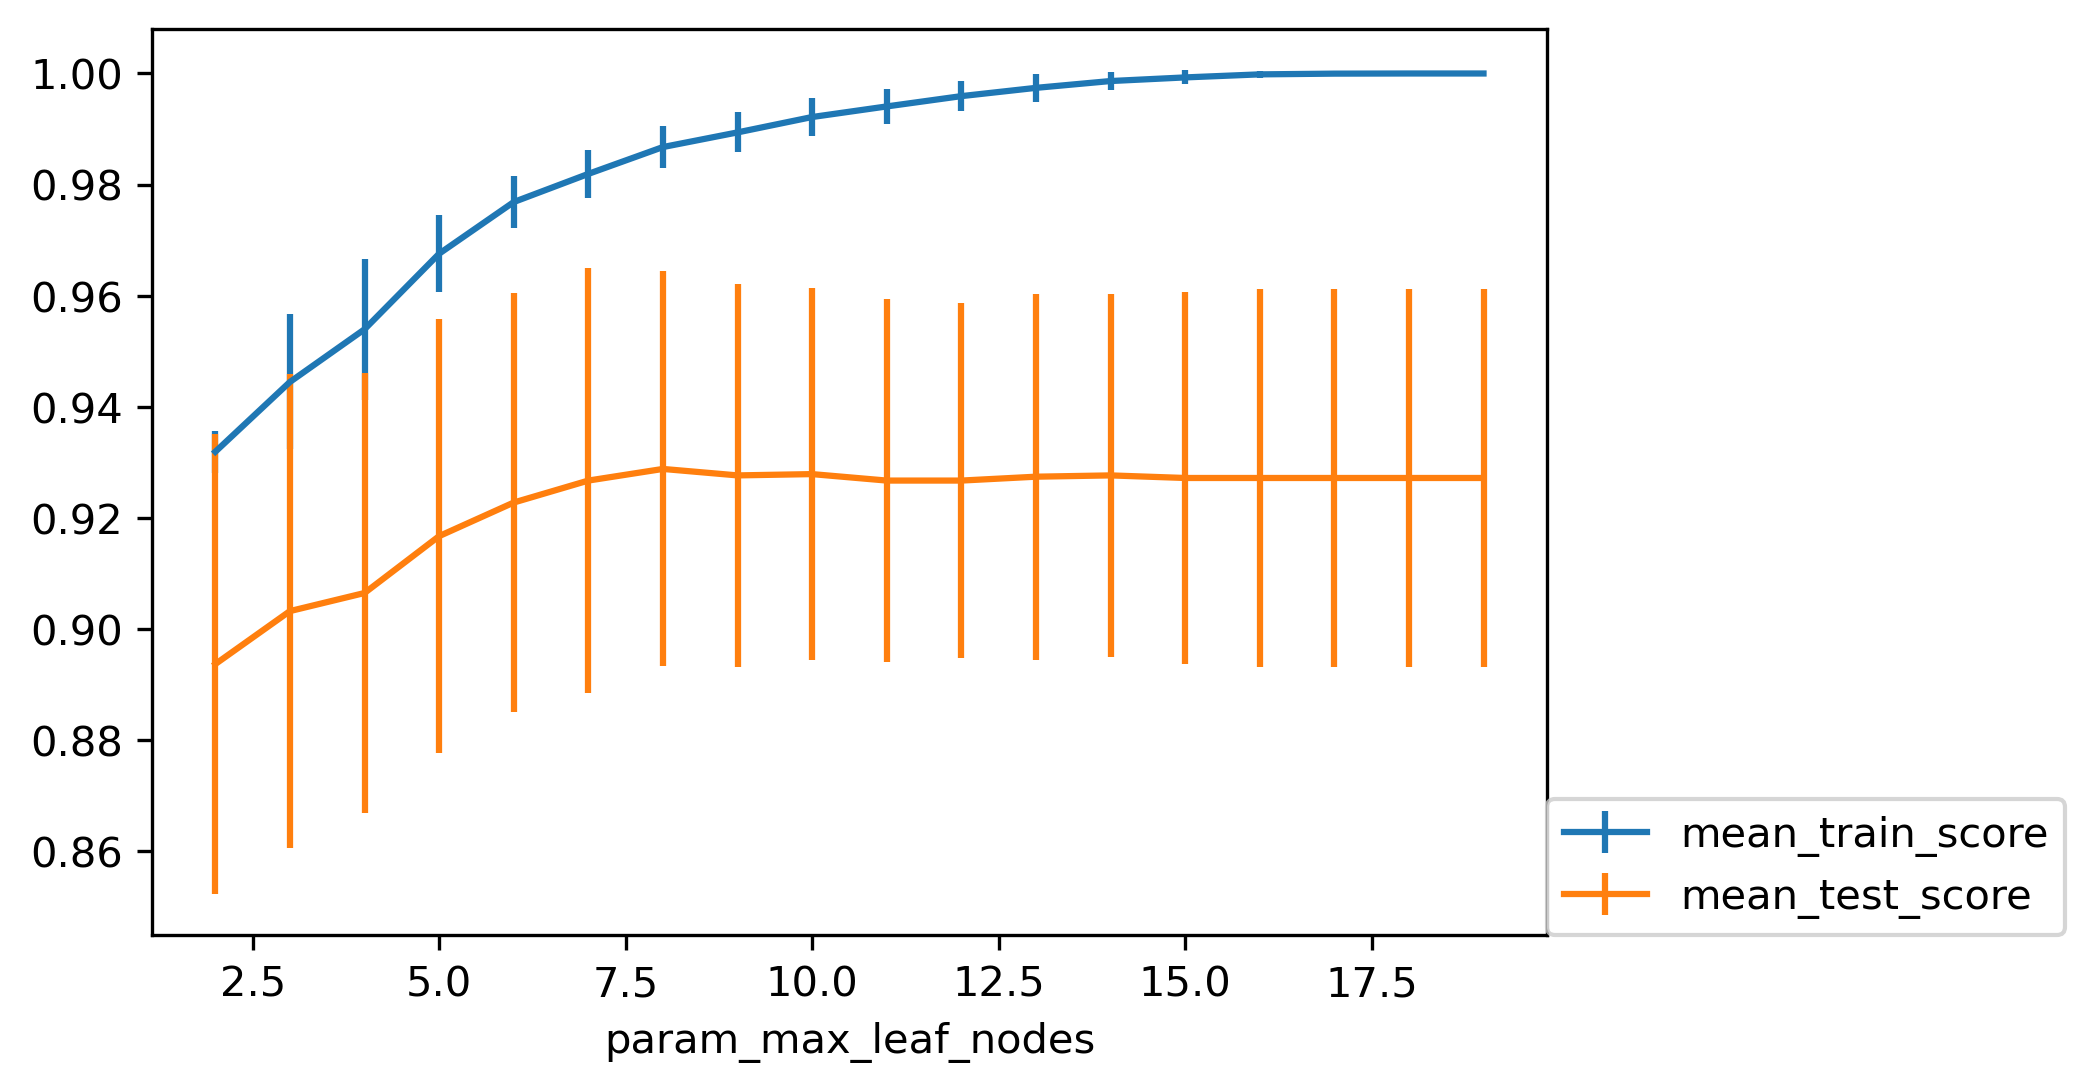

Here our maximum accuracy is at 8 (max_leaf_nodes) then our accuracy tends to decreases


In [69]:
#Visualizing 

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y =['mean_train_score'], yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y =['mean_test_score'],yerr = 'std_test_score', ax=plt.gca())

plt.legend(loc = (1,0))
plt.show()

print('Here our maximum accuracy is at 8 (max_leaf_nodes) then our accuracy tends to decreases')